In [1]:
import sys
import os
import numpy as np
import sdeint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [79]:
alpha = 15.0
gamma = 2.0
sigma = 1

In [90]:
N_PATHS = 5000
tspan = np.linspace(0.0, 2.0, 400)

In [91]:
paths = np.empty((N_PATHS, len(tspan)))

In [92]:
np.random.seed(42)
for i in range(N_PATHS):
    paths[i, :] = sdeint.itoint(f=lambda x, t: +alpha*(np.sin(x / (2*np.pi))) - gamma * x, G=lambda x, t: sigma * (1 + np.abs(x)), y0=np.random.normal(scale=3), tspan=tspan).flatten()

In [93]:
train_paths, test_paths = train_test_split(paths, shuffle=True, random_state=42, train_size=0.8)

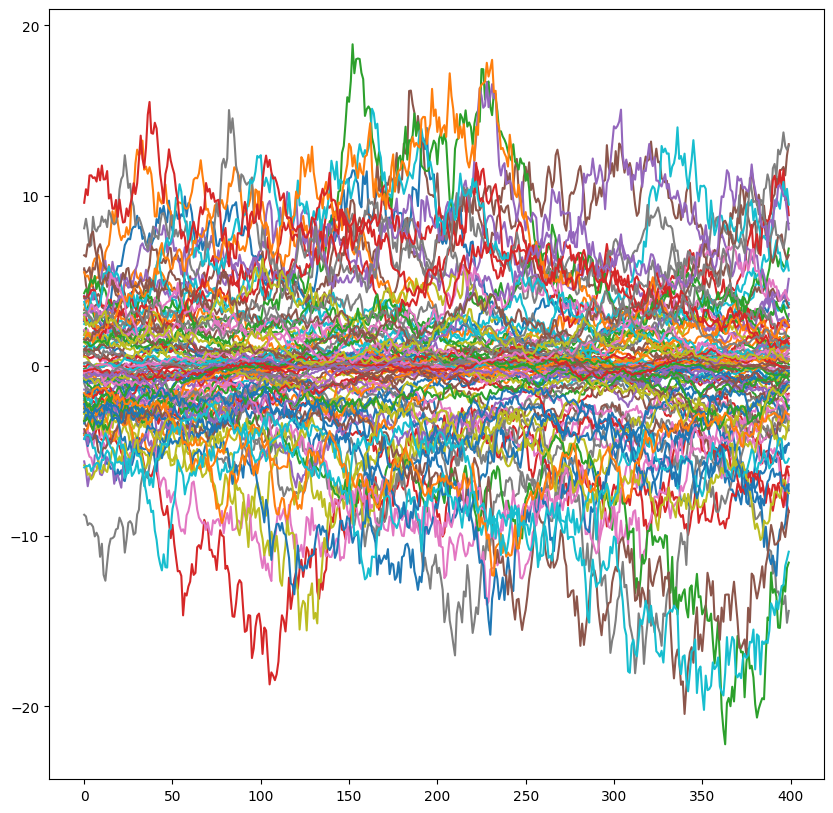

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for i in range(100):
    ax.plot(test_paths[i, :])
# ax.set_ylim(-5, 5)

In [95]:
np.save("./sin_train_samples.npy", train_paths)
np.save("./sin_test_samples.npy", test_paths)
np.save("./sin_tspan.npy", tspan)

In [96]:
bms = np.empty((N_PATHS // 5, len(tspan)))
np.random.seed(2022)
for i in range(bms.shape[0]):
    bms[i, :] = sdeint.itoint(f=lambda x, t: 0, G = lambda x, t: 1, y0=0, tspan=tspan).flatten()

In [ ]:
np.save("./sin_test_bms.npy", bms)

In [ ]:
train_bms = np.empty((len(train_paths), len(tspan)))
for i in range(train_bms.shape[0]):
    train_bms[i, :] = sdeint.itoint(f=lambda x, t: 0, G = lambda x, t: 1, y0=0, tspan=tspan).flatten()
    


In [ ]:
np.save("./sin_train_bms.npy", train_bms)